#To perform point wise Mutual Information in python

PMI Formula with negative values caped to 0:

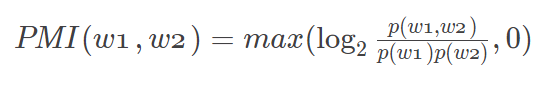

In [32]:
import math
from collections import Counter

def calculate_pmi(word1_count, word2_count, cooccur_count, total_count):
    p_word1 = word1_count / total_count
    p_word2 = word2_count / total_count
    p_cooccur = cooccur_count / total_count

    # Check for non-positive values to avoid math domain error
    if p_word1 * p_word2 == 0 or p_cooccur == 0:
        return 0  # Cap negative PMI values to 0
    else:
        pmi = max(0, math.log2(p_cooccur / (p_word1 * p_word2)))
        return pmi

# Given corpus
corpus = ['this is a foo bar bar black sheep foo bar bar black sheep foo bar bar black sheep shep bar bar black sentence']

# Tokenize the corpus
tokenized_corpus = corpus[0].split()

# Count occurrences of each word and co-occurrences
word_counts = Counter(tokenized_corpus)
cooccur_counts = Counter(zip(tokenized_corpus, tokenized_corpus[1:]))

# Calculate PMI for all possible word pairs
word_pairs = [(word1, word2) for word1 in word_counts.keys() for word2 in word_counts.keys() if word1 != word2]

for word1, word2 in word_pairs:
    cooccur_pair = (word1, word2)
    pmi_value = calculate_pmi(word_counts[word1], word_counts[word2], cooccur_counts[cooccur_pair], len(tokenized_corpus))
    if(pmi_value != 0):
      print(f'PMI between {word1} and {word2}: {pmi_value}')


PMI between this and is: 4.523561956057013
PMI between is and a: 4.523561956057013
PMI between a and foo: 2.9385994553358565
PMI between foo and bar: 1.5235619560570128
PMI between bar and black: 1.5235619560570128
PMI between black and sheep: 2.523561956057013
PMI between black and sentence: 2.523561956057013
PMI between sheep and foo: 2.3536369546147005
PMI between sheep and shep: 2.9385994553358565
PMI between shep and bar: 1.5235619560570128


In [31]:
from collections import Counter, OrderedDict
import numpy as np
import pandas as pd

def calculate_pmi(word1_count, word2_count, cooccur_count, total_count):
    p_word1 = word1_count / total_count
    p_word2 = word2_count / total_count
    p_cooccur = cooccur_count / total_count

    # Check for non-positive values to avoid math domain error
    if p_word1 * p_word2 == 0 or p_cooccur == 0:
        return 0  # Cap negative PMI values to 0
    else:
        pmi = max(0, np.log2(p_cooccur / (p_word1 * p_word2)))  # Use numpy for log2
        return pmi

# Given corpus
corpus = ['this is a foo bar bar black sheep foo bar bar black sheep foo bar bar black sheep shep bar bar black sentence']

# Tokenize the corpus
tokenized_corpus = corpus[0].split()

print(f"Tokens : {len(tokenized_corpus)}\n")

# Calculate word counts
word_counts = Counter(tokenized_corpus)

# Convert word_counts to DataFrame
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Count'])
word_counts_df.index.name = 'Word'

# Print word counts DataFrame
print("Word Counts:")
print(word_counts_df.T)
print()

# Create a co-occurrence matrix with headers
unique_words = list(OrderedDict.fromkeys(tokenized_corpus))  # Preserve order of appearance
cooccur_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
for i in range(len(tokenized_corpus) - 1):
    row_index = unique_words.index(tokenized_corpus[i])
    col_index = unique_words.index(tokenized_corpus[i + 1])
    cooccur_matrix[row_index][col_index] += 1

# Convert co-occurrence matrix to DataFrame
cooccur_df = pd.DataFrame(cooccur_matrix, index=unique_words, columns=unique_words)

# Print the co-occurrence matrix DataFrame
print("Co-occurrence Matrix:")
print(cooccur_df)
print()

# Calculate PMI for all possible word pairs
word_counts = Counter(tokenized_corpus)
cooccur_counts = Counter(zip(tokenized_corpus, tokenized_corpus[1:]))

word_pairs = [(word1, word2) for word1 in word_counts.keys() for word2 in word_counts.keys() if word1 != word2]

for word1, word2 in word_pairs:
    cooccur_pair = (word1, word2)
    pmi_value = calculate_pmi(word_counts[word1], word_counts[word2], cooccur_counts[cooccur_pair], len(tokenized_corpus))
    if(pmi_value != 0):
      print(f'PMI between {word1} and {word2}: {pmi_value}')


Tokens : 23

Word Counts:
Word   this  is  a  foo  bar  black  sheep  shep  sentence
Count     1   1  1    3    8      4      3     1         1

Co-occurrence Matrix:
          this  is  a  foo  bar  black  sheep  shep  sentence
this         0   1  0    0    0      0      0     0         0
is           0   0  1    0    0      0      0     0         0
a            0   0  0    1    0      0      0     0         0
foo          0   0  0    0    3      0      0     0         0
bar          0   0  0    0    4      4      0     0         0
black        0   0  0    0    0      0      3     0         1
sheep        0   0  0    2    0      0      0     1         0
shep         0   0  0    0    1      0      0     0         0
sentence     0   0  0    0    0      0      0     0         0

PMI between this and is: 4.523561956057013
PMI between is and a: 4.523561956057013
PMI between a and foo: 2.9385994553358565
PMI between foo and bar: 1.5235619560570128
PMI between bar and black: 1.52356195605701

In [34]:
word1='bar'
word2='bar'
cooccur_pair = (word1, word2)
pmi_value = calculate_pmi(word_counts[word1], word_counts[word2], cooccur_counts[cooccur_pair], len(tokenized_corpus))
print(f'PMI between {word1} and {word2}: {pmi_value}')

PMI between bar and bar: 0.5235619560570128
